# Propagación de errores: 

La falta de exactitud o precisión puede amplificarse en cálculos complejos.

Este ejemplo ilustra cómo pequeños errores de redondeo, que son inevitables en los cálculos por computadora, pueden acumularse y amplificarse en cálculos complejos o repetitivos, llevando a resultados significativamente diferentes del valor verdadero.

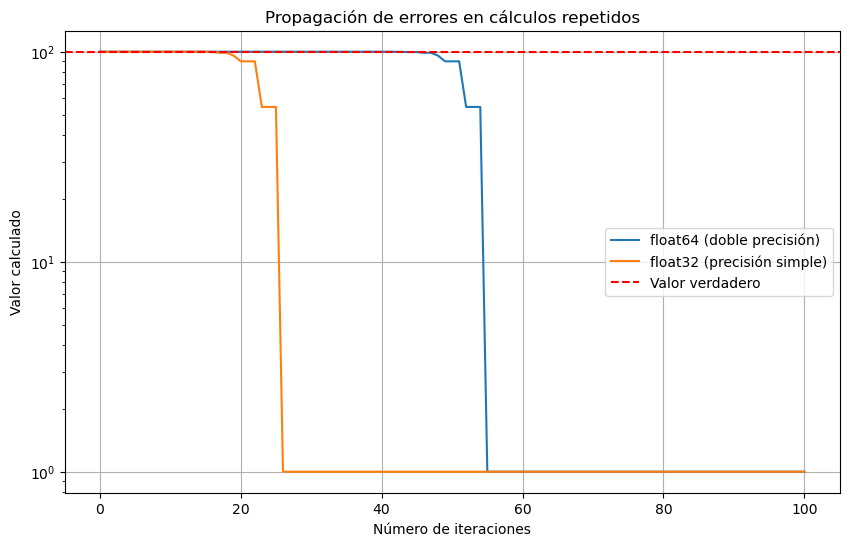

Valor final (float64): 1.0
Valor final (float32): 1.0
Valor verdadero: 100


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def repeated_sqrt(x, n):
    """Calcula la raíz cuadrada repetidamente n veces."""
    for _ in range(n):
        x = np.sqrt(x)
    return x

def inverse_repeated_sqrt(x, n):
    """Realiza la operación inversa de repeated_sqrt."""
    for _ in range(n):
        x = x**2
    return x

# Parámetros
n_iterations = 100
true_value = 100

# Cálculos con precisión float64 (doble precisión)
x_float64 = true_value
y_float64 = [x_float64]
for i in range(n_iterations):
    x_float64 = repeated_sqrt(x_float64, 1)
    y_float64.append(inverse_repeated_sqrt(x_float64, i+1))

# Cálculos con precisión float32 (precisión simple)
x_float32 = np.float32(true_value)
y_float32 = [x_float32]
for i in range(n_iterations):
    x_float32 = np.float32(repeated_sqrt(x_float32, 1))
    y_float32.append(inverse_repeated_sqrt(x_float32, i+1))

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations + 1), y_float64, label='float64 (doble precisión)')
plt.plot(range(n_iterations + 1), y_float32, label='float32 (precisión simple)')
plt.axhline(y=true_value, color='r', linestyle='--', label='Valor verdadero')
plt.xlabel('Número de iteraciones')
plt.ylabel('Valor calculado')
plt.title('Propagación de errores en cálculos repetidos')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

print(f"Valor final (float64): {y_float64[-1]}")
print(f"Valor final (float32): {y_float32[-1]}")
print(f"Valor verdadero: {true_value}")
